<a href="https://colab.research.google.com/github/PrasannaKumarKB/Speciallab/blob/main/MOVIE_RECOMMENDER_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-6-6f629724e603>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recommendations, y=[1, 1], palette="viridis")


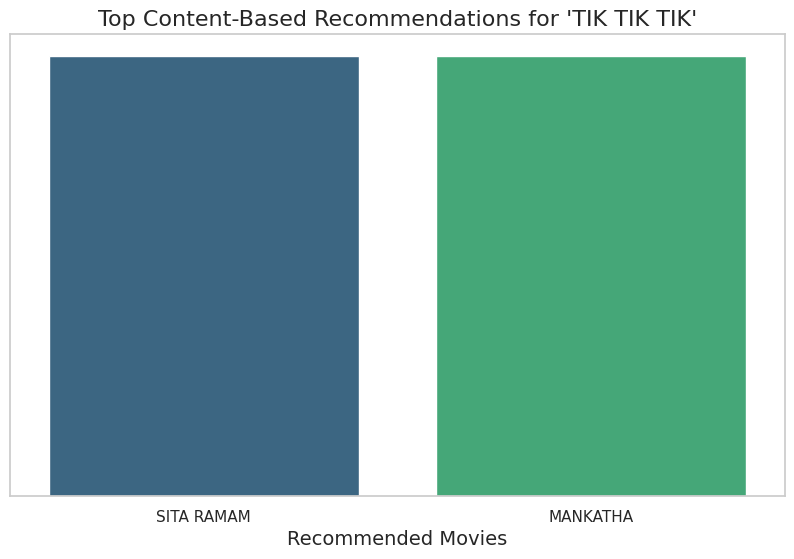

<ipython-input-6-6f629724e603>:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movies, y=ratings, palette="coolwarm")


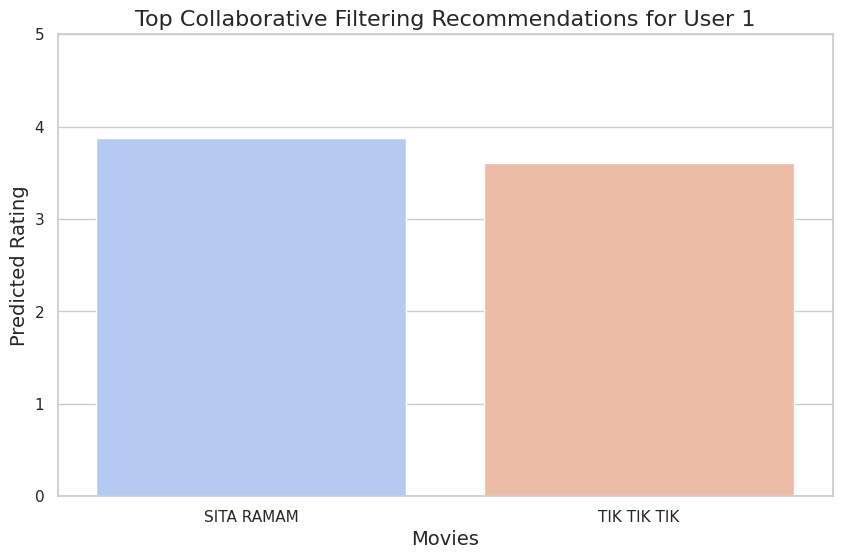

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'title': ['TIK TIK TIK', 'SITA RAMAM', 'MANKATHA', '96'],
    'description': [
        'A thrilling adventure about space exploration',
        'A romantic drama that takes place in the 1800s',
        'An action-packed superhero movie with great stunts',
        'A touching story of friendship and love in a small town'
    ]
}

df = pd.DataFrame(data)

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

def recommend(title, cosine_sim=cosine_sim):
    idx = df.index[df['title'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:3]  # Get top 2 recommendations
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

def plot_content_based_recommendations(movie_title, recommendations):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=recommendations, y=[1, 1], palette="viridis")
    plt.title(f"Top Content-Based Recommendations for '{movie_title}'", fontsize=16)
    plt.xlabel("Recommended Movies", fontsize=14)
    plt.yticks([])
    plt.show()

movie_title = 'TIK TIK TIK'
recommended_movies = recommend(movie_title)
plot_content_based_recommendations(movie_title, recommended_movies)

from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

ratings_data = {
    'user_id': [1, 1, 1, 2, 2, 3],
    'item_id': ['TIK TIK TIK', 'SITA RAMAM', 'MANKATHA', 'TIK TIK TIK', '96', 'SITA RAMAM'],
    'rating': [5, 3, 4, 2, 4, 5]
}

ratings_df = pd.DataFrame(ratings_data)

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['user_id', 'item_id', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2)

model = SVD()
model.fit(trainset)

predictions = model.test(testset)

def get_top_n(predictions, n=3):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n = get_top_n(predictions, n=2)

def plot_collaborative_recommendations(top_n):
    for user_id, user_recommendations in top_n.items():
        movies = [rec[0] for rec in user_recommendations]
        ratings = [rec[1] for rec in user_recommendations]

        plt.figure(figsize=(10, 6))
        sns.barplot(x=movies, y=ratings, palette="coolwarm")
        plt.title(f"Top Collaborative Filtering Recommendations for User {user_id}", fontsize=16)
        plt.xlabel("Movies", fontsize=14)
        plt.ylabel("Predicted Rating", fontsize=14)
        plt.ylim(0, 5)
        plt.show()

plot_collaborative_recommendations(top_n)
